In [47]:
# Imports
import numpy as np
import autograd.numpy as anp
from matplotlib import pyplot as plt
from autograd import grad, jacobian

In [48]:
# Matplotlib latex

plt.rc('text', usetex=True)
font = {'size':15}
plt.rc('font',**font)
plt.rc('legend',**{'fontsize':12})

In [49]:
def sigma(x):
    return 0.5 * (1+anp.tanh(x/2))
#    return 1/(1+np.exp(-x))
    

def step(y_0):

    #    These three equations are equivalent by applying a change of variables
    y = y_0 + dt / tau * (-y_0 + 0.5 * anp.tanh(0.5 * (W.T @ (y_0 + 0.5) + th)))
    return y

def lyapunov(y_0, running_steps, transient_steps):

    Jacobian_Func = jacobian(step)

    dx = np.identity(N)
    S = np.zeros(N)

    T = transient_steps + running_steps

    y = np.zeros((N, running_steps))
    # Debugging variable
    S_i = np.zeros((N, running_steps))

    for t in range(T):
        y_0 = step(y_0)

        if t >= transient_steps:
            y[:, t - transient_steps] = y_0

            J = Jacobian_Func(y_0)

            # perturbation
            dx = np.matmul(J, dx)

            Q, R = np.linalg.qr(dx)
            d_exp = np.absolute(np.diag(R))
            dS = np.log(d_exp)

            # Q is orthogonal so we can use it as the perturbation for the next step
            dx = Q

            S += dS

            S_i[:, t - transient_steps] = S

    S /= running_steps

    return y, S, S_i

def set_params(mode):
    global tau
    tau = np.ones(N)
    if mode == "periodic":
        global W 
        W = np.ones((N,N))
        di = np.diag_indices(N)
        W[di] = 10
        global th 
        th = np.ones(N) * -6
    else:
        # saddle_limit
        W = np.array([[5.422, -0.24, 0.535], [-0.018, 4.59, -2.25], [2.75, 1.21, 3.885]])
        th = np.array([-4.108, -2.787, -1.114])
        if mode == "periodic_limit":
            tau[1] = 1.92
        elif mode == "chaotic":
            tau[1] = 2.5

    global dt    
    dt = 0.01



In [50]:
N=3


## Periodic

In [51]:
mode = "periodic"
set_params(mode)

In [52]:
y_0 = np.random.randn(N)*0.1
transient_steps = 400000
running_steps = 400000

y, S, S_i = lyapunov(y_0, running_steps, transient_steps)

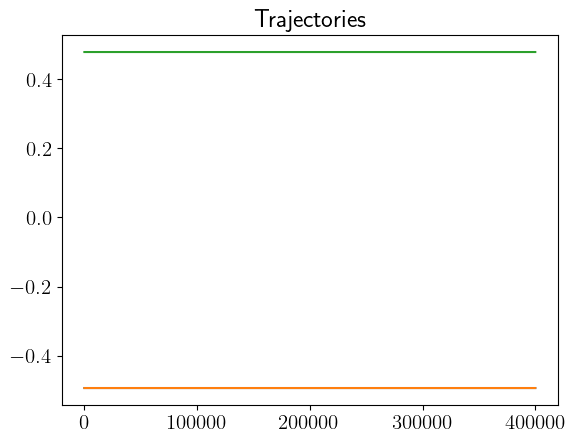

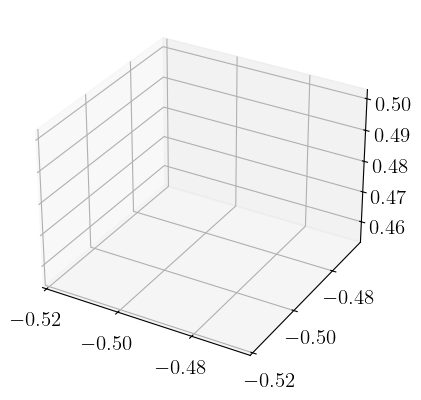

In [53]:
plt.figure()
plt.plot(y.T)
plt.title("Trajectories")

ax = plt.figure().add_subplot(projection='3d')
ax.plot(y[0,:], y[1,:], y[2,:])


In [54]:
print("Lyapunov exponents", S)

Lyapunov exponents [-0.00786149 -0.00941111 -0.0092881 ]


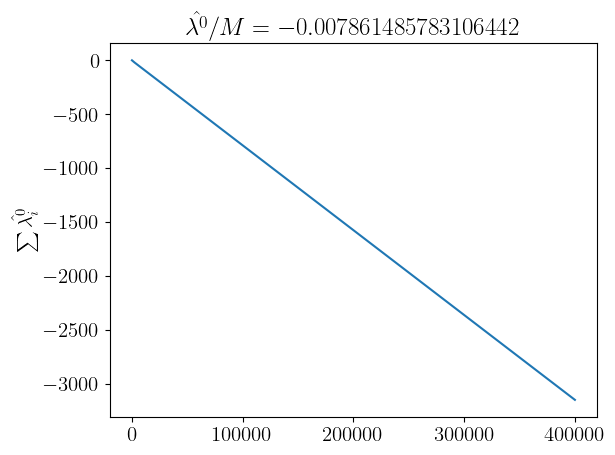

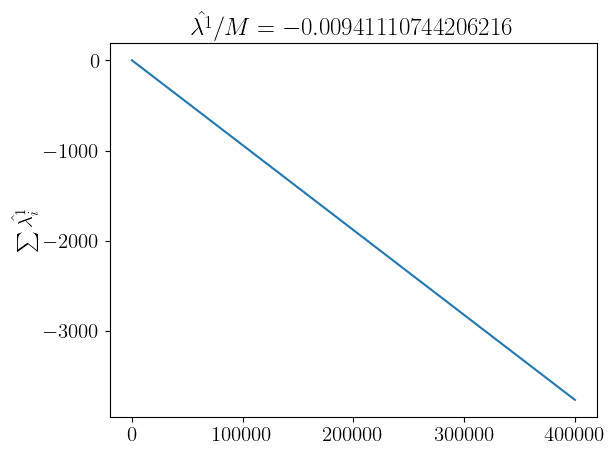

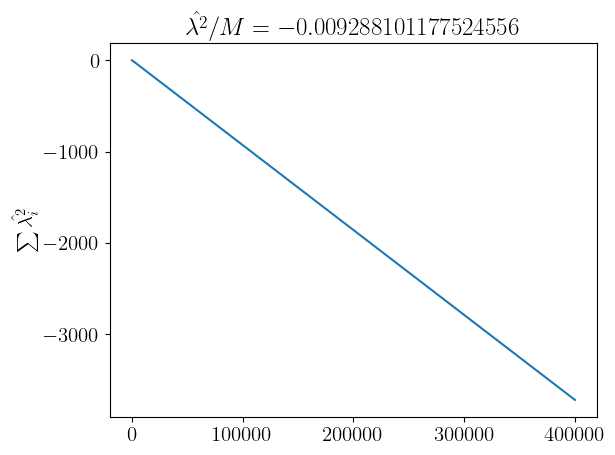

In [55]:
plt.figure()
plt.plot(S_i[0,:])
plt.title(fr"$\hat{{\lambda^0}}/M = {S[0]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^0_i}}$")
plt.tight_layout()
plt.figure()
plt.plot(S_i[1,:])
plt.title(fr"$\hat{{\lambda^1}}/M = {S[1]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^1_i}}$")
plt.tight_layout()
plt.figure()
plt.plot(S_i[2,:])
plt.title(fr"$\hat{{\lambda^2}}/M = {S[2]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^2_i}}$")
plt.tight_layout()
plt.show()

## Periodic limit

In [71]:
mode = "periodic_limit"
set_params(mode)

In [72]:
y_0 = np.random.randn(N)*0.1
transient_steps = 400000
running_steps = 400000

y, S, S_i = lyapunov(y_0, running_steps, transient_steps)

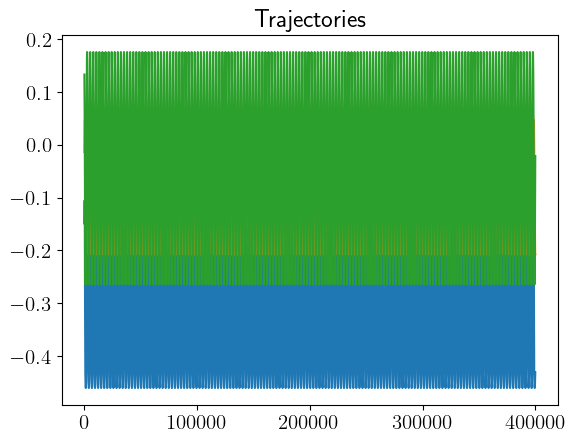

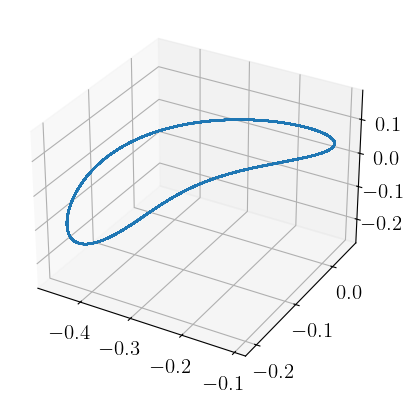

In [73]:
plt.figure()
plt.plot(y.T)
plt.title("Trajectories")

ax = plt.figure().add_subplot(projection='3d')
ax.plot(y[0,:], y[1,:], y[2,:])


In [74]:
print("Lyapunov exponents", S)

Lyapunov exponents [-7.97711257e-08 -6.92179203e-04 -3.63502429e-03]


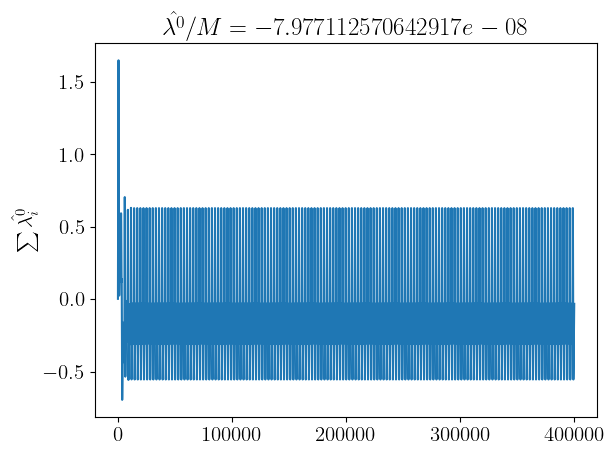

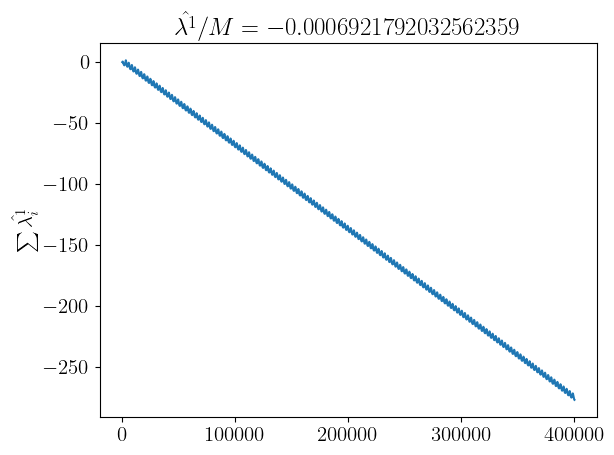

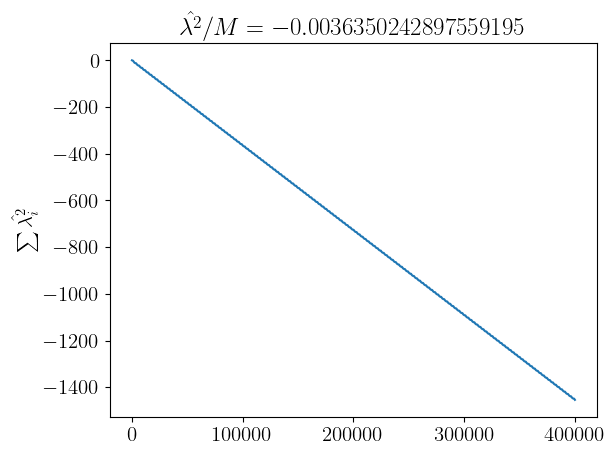

In [75]:
plt.figure()
plt.plot(S_i[0,:])
plt.title(fr"$\hat{{\lambda^0}}/M = {S[0]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^0_i}}$")
plt.tight_layout()
plt.figure()
plt.plot(S_i[1,:])
plt.title(fr"$\hat{{\lambda^1}}/M = {S[1]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^1_i}}$")
plt.tight_layout()
plt.figure()
plt.plot(S_i[2,:])
plt.title(fr"$\hat{{\lambda^2}}/M = {S[2]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^2_i}}$")
plt.tight_layout()
plt.show()

## Saddle limit?

In [61]:
mode = "saddle_limit"
set_params(mode)

In [62]:
y_0 = np.random.randn(N)*0.1
transient_steps = 400000
running_steps = 400000

y, S, S_i = lyapunov(y_0, running_steps, transient_steps)

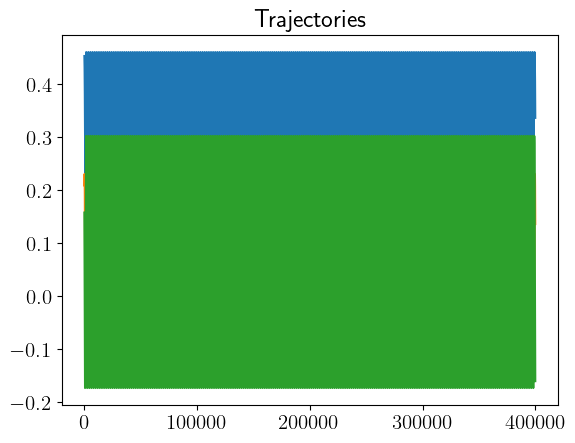

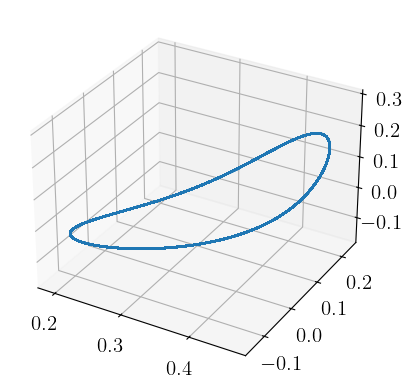

In [63]:
plt.figure()
plt.plot(y.T)
plt.title("Trajectories")

ax = plt.figure().add_subplot(projection='3d')
ax.plot(y[0,:], y[1,:], y[2,:])


In [64]:
print("Lyapunov exponents", S)

Lyapunov exponents [-6.48496378e-06 -1.19401700e-03 -4.21982480e-03]


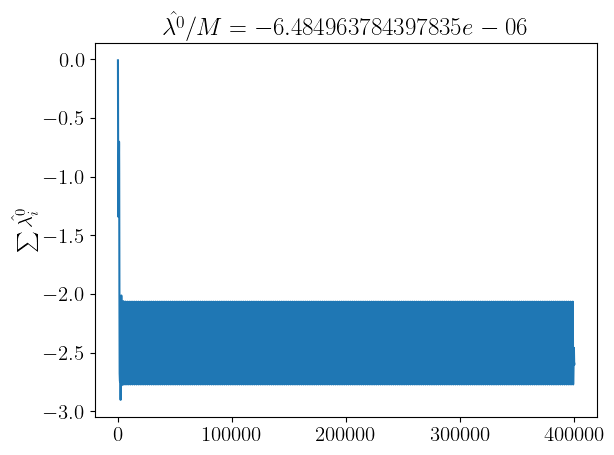

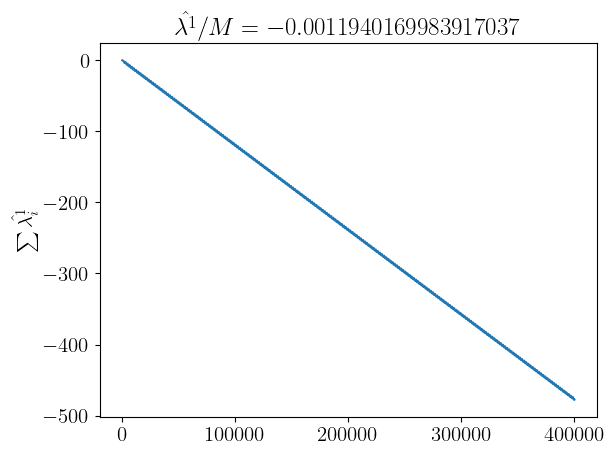

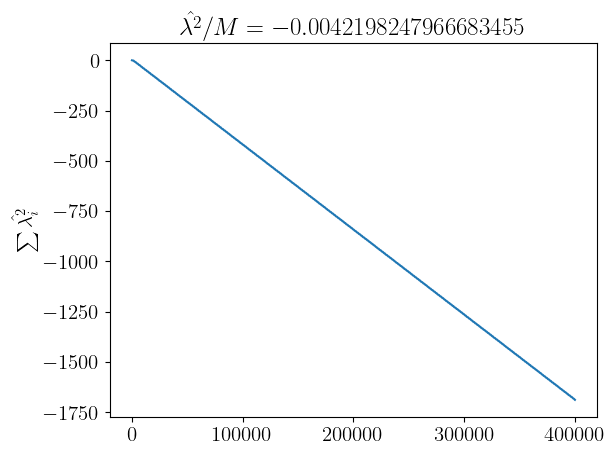

In [65]:
plt.figure()
plt.plot(S_i[0,:])
plt.title(fr"$\hat{{\lambda^0}}/M = {S[0]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^0_i}}$")
plt.tight_layout()
plt.figure()
plt.plot(S_i[1,:])
plt.title(fr"$\hat{{\lambda^1}}/M = {S[1]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^1_i}}$")
plt.tight_layout()
plt.figure()
plt.plot(S_i[2,:])
plt.title(fr"$\hat{{\lambda^2}}/M = {S[2]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^2_i}}$")
plt.tight_layout()
plt.show()

## Chaotic

In [66]:
mode = "chaotic"
set_params(mode)

In [67]:
y_0 = np.random.randn(N)*0.1
transient_steps = 400000
running_steps = 400000

y, S, S_i = lyapunov(y_0, running_steps, transient_steps)

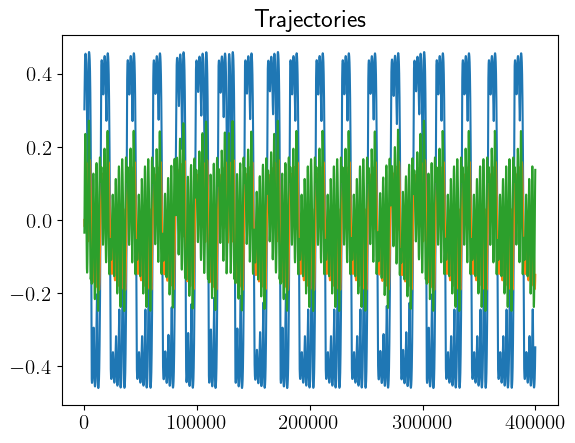

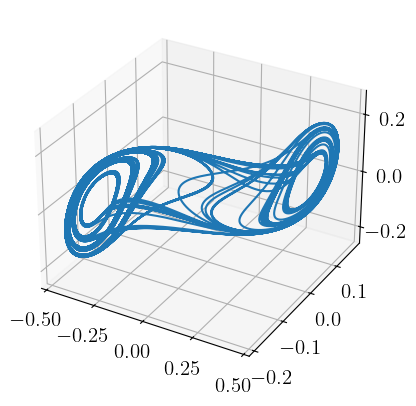

In [68]:
plt.figure()
plt.plot(y.T)
plt.title("Trajectories")

ax = plt.figure().add_subplot(projection='3d')
ax.plot(y[0,:], y[1,:], y[2,:])


In [69]:
print("Lyapunov exponents", S)

Lyapunov exponents [ 7.47218891e-05 -5.81992781e-06 -4.79783180e-03]


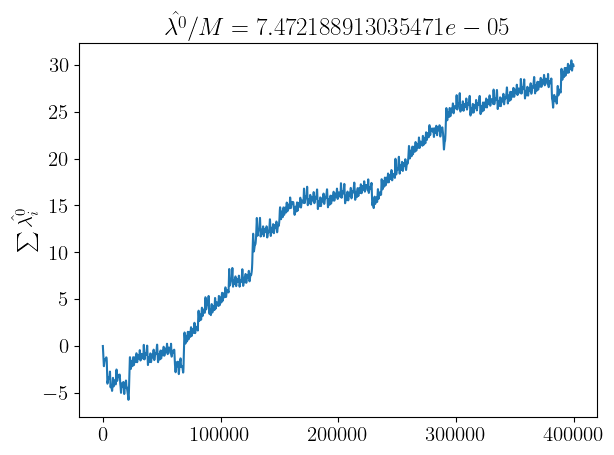

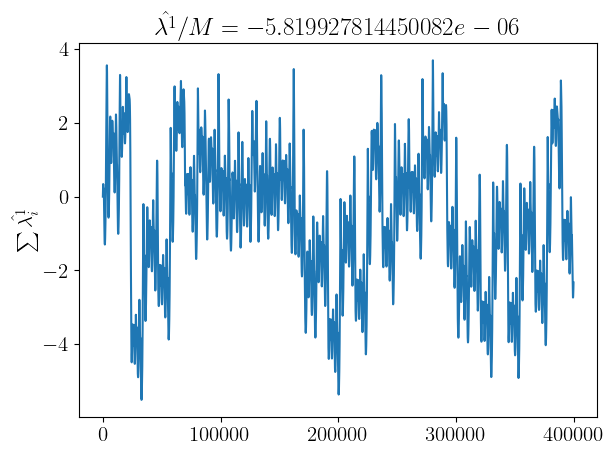

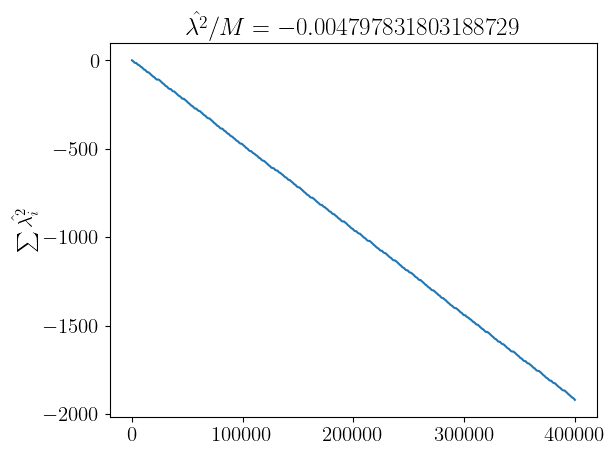

In [70]:
plt.figure()
plt.plot(S_i[0,:])
plt.title(fr"$\hat{{\lambda^0}}/M = {S[0]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^0_i}}$")
plt.tight_layout()
plt.figure()
plt.plot(S_i[1,:])
plt.title(fr"$\hat{{\lambda^1}}/M = {S[1]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^1_i}}$")
plt.tight_layout()
plt.figure()
plt.plot(S_i[2,:])
plt.title(fr"$\hat{{\lambda^2}}/M = {S[2]}$")
plt.ylabel(fr"$\sum\hat{{\lambda^2_i}}$")
plt.tight_layout()
plt.show()